## Audio and Music Processing Lab - Module 2
### Final assignment: Melodic aspect of Arab Andalusian Music
Abhishek, Francesco

RQ: melodic similarities and pattern recognition in different Nawbas.
Find similarity patterns between the instrumental preludes, between the sung poems and in themselves.

### Importing necessary modules

In [21]:
import music21
from music21 import *
import matplotlib.pyplot as plt
from music21 import analysis
import numpy as np
import music21 as m21
%matplotlib inline


### Loading all the Nawbas

In [22]:
# Nawba 1, 'Btayhi_Isbahan'
s1 = converter.parse(
    'Btayhi_Isbahan.mxl')

scoreParts1 = s1.parts.stream()
part1 = scoreParts1[0]

measures1 = part1.getElementsByClass(stream.Measure).stream()
limited_measures1 = part1.measures(1, 200)


# Nawba 2, Btayhi_Istihlal
s2 = converter.parse(
    'Btayhi_Istihlal.mxl')

scoreParts2 = s2.parts.stream()
part2 = scoreParts2[0]

measures2 = part2.getElementsByClass(stream.Measure).stream()
limited_measures2 = part2.measures(1, 200)


# Nawba 3, Btayhi_Maya
s3 = converter.parse(
    'Btayhi_Maya.mxl')

scoreParts3 = s3.parts.stream()
part3 = scoreParts3[0]

measures3 = part3.getElementsByClass(stream.Measure).stream()
limited_measures3 = part3.measures(1, 200)

# Nawba 4, Raml_Maya
s4 = converter.parse(
    'Btayhi_Raml_Maya.mxl')

scoreParts4 = s4.parts.stream()
part4 = scoreParts4[0]

measures4 = part4.getElementsByClass(stream.Measure).stream()
limited_measures4 = part4.measures(1, 200)

# Nawba 5, Btayhi_Rasd_Dayl
s5 = converter.parse(
    'Btayhi_Rasd_Dayl.mxl')

scoreParts5 = s5.parts.stream()
part5 = scoreParts5[0]

measures5 = part5.getElementsByClass(stream.Measure).stream()
limited_measures5 = part5.measures(1, 200)


#s.show()


In [23]:
# scoreParts1 = s1.parts.stream()
# for element in scoreParts1.elements:
#     print(element)


# Pitch span analysis

In [46]:
p = analysis.discrete.Ambitus()
k = analysis.discrete.KrumhanslSchmuckler()


In [25]:
def get_pitch_span_dict(score_number, measures_number):
    pitch_span_dict = {}
    pitch_span_count = 0
    no_pitch_span_count = 0

    for i in range(len(measures_number)):
        pitch_span_measure_index = f"measure[{i}]"

        measures = score_number.parts[0].getElementsByClass(stream.Measure)[i]

        # pitch_span_value returns class object with min and max values like: (<music21.pitch.Pitch G4>, <music21.pitch.Pitch G4>)
        pitch_span_value = p.getPitchSpan(measures)

        if pitch_span_value is not None:
            pitchMin, pitchMax = pitch_span_value
            minimum_note = pitchMin.nameWithOctave
            maximum_note = pitchMax.nameWithOctave
            aInterval = music21.interval.Interval(
                pitchStart=pitchMin, pitchEnd=pitchMax)
            aInterval_simple_name = aInterval.simpleName
            pitch_span_dict[pitch_span_measure_index] = (
                pitchMin, pitchMax, minimum_note, maximum_note, aInterval, aInterval_simple_name)
            pitch_span_count += 1
        else:
            no_pitch_span_count += 1

    print(
        f"found pitch span in {pitch_span_count} measures of the whole score")
    print(
        f"found no pitch span in {no_pitch_span_count} measures of the whole")

    return pitch_span_dict


In [26]:
pitch_span_dict1 = get_pitch_span_dict(s1, measures1)
pitch_span_dict2 = get_pitch_span_dict(s2, measures2)
pitch_span_dict3 = get_pitch_span_dict(s3, measures3)
pitch_span_dict4 = get_pitch_span_dict(s4, measures4)
pitch_span_dict5 = get_pitch_span_dict(s5, measures5)


found pitch span in 424 measures of the whole score
found no pitch span in 71 measures of the whole
found pitch span in 1224 measures of the whole score
found no pitch span in 9 measures of the whole
found pitch span in 595 measures of the whole score
found no pitch span in 65 measures of the whole
found pitch span in 699 measures of the whole score
found no pitch span in 0 measures of the whole
found pitch span in 393 measures of the whole score
found no pitch span in 59 measures of the whole


In [27]:
# printing one value of the dictionary for testing
print("pitch_span", pitch_span_dict1["measure[1]"])

pitch_span (<music21.pitch.Pitch E4>, <music21.pitch.Pitch B-4>, 'E4', 'B-4', <music21.interval.Interval d5>, 'd5')


## plotting the pitch span

In [57]:
def plot_pitch_span(limited_measures, pitch_span_dict, measure_range_number, title, figsize=(10, 6)):
    # Get the pitches for each measure
    measure_pitches = []
    measure_intervals = []
    for measure_index in pitch_span_dict:
        pitches = pitch_span_dict[measure_index]
        pitches = pitches[2:4]
        pitches = [m21.pitch.Pitch(p)
                   for p in pitches]  # convert to Pitch objects
        measure_pitches.append(pitches)
        # get interval as string
        measure_intervals.append(str(pitch_span_dict[measure_index][5]))

    # Create a scatter plot
    fig, ax = plt.subplots(figsize=figsize)
    for i in range(measure_range_number):
        x = i
        y_min = measure_pitches[i][0].ps
        y_max = measure_pitches[i][1].ps
        ax.scatter([x, x], [y_min, y_max], c='b')
        ax.plot([x-0.1, x+0.1], [y_min, y_min], c='b')
        ax.plot([x-0.1, x+0.1], [y_max, y_max], c='b')
        # add interval as text to plot
        ax.text(x, y_max, measure_intervals[i], ha='center', va='bottom')

    # Set the x-axis labels to the measure numbers
    ax.set_xticks(range(measure_range_number))
    ax.set_xticklabels([f" {i}" for i in range(1, measure_range_number+1)])

    # Set the y-axis labels to the pitch names
    pitch_names = sorted(
        set([pitch.nameWithOctave for pitch_tuple in measure_pitches for pitch in pitch_tuple]))
    ax.set_yticks([m21.pitch.Pitch(p).ps for p in pitch_names])
    ax.set_yticklabels(pitch_names)

    # Set the plot title and axis labels
    ax.set_title(title)
    ax.set_xlabel("Measure")
    ax.set_ylabel("Pitch")

    # Show the plot
    plt.grid(color='black', linestyle='-', linewidth=0.5, zorder=2.5)
    plt.figure(figsize=(10, 6))
    plt.show()

    # plot histogram

    measure_intervals = []
    for measure in pitch_span_dict.values():
        interval_name = measure[5]
        measure_intervals.append(interval_name)

    print(f"unique intervals in this score{title}", np.unique(measure_intervals))
    bin_edges = range(13)
    bin_width = 0.7

    # create a histogram of the intervals
    plt.hist(measure_intervals, bins=[
            edge - bin_width/2 for edge in bin_edges], density=True, width=bin_width, zorder=2.5)
    plt.xticks(range(12), ('P1', 'm2', 'M2', 'm3', 'M3',
            'P4', 'A4/d5', 'P5', 'm6', 'M6', 'm7', 'M7'))
    plt.xlabel('Interval')
    plt.ylabel('Frequency')
    plt.title(f"{title} and its intervals")
    plt.grid(color='black', linestyle='--', linewidth=0.5)
    plt.show()
    
  
    # histogram of notes
    plot_pitch = limited_measures.plot('histogram', 'pitch')
    
    # key of the score
    key = print("key of the score is", k.getSolution(
        limited_measures))  # this seems correct


   
    return key, plot_pitch


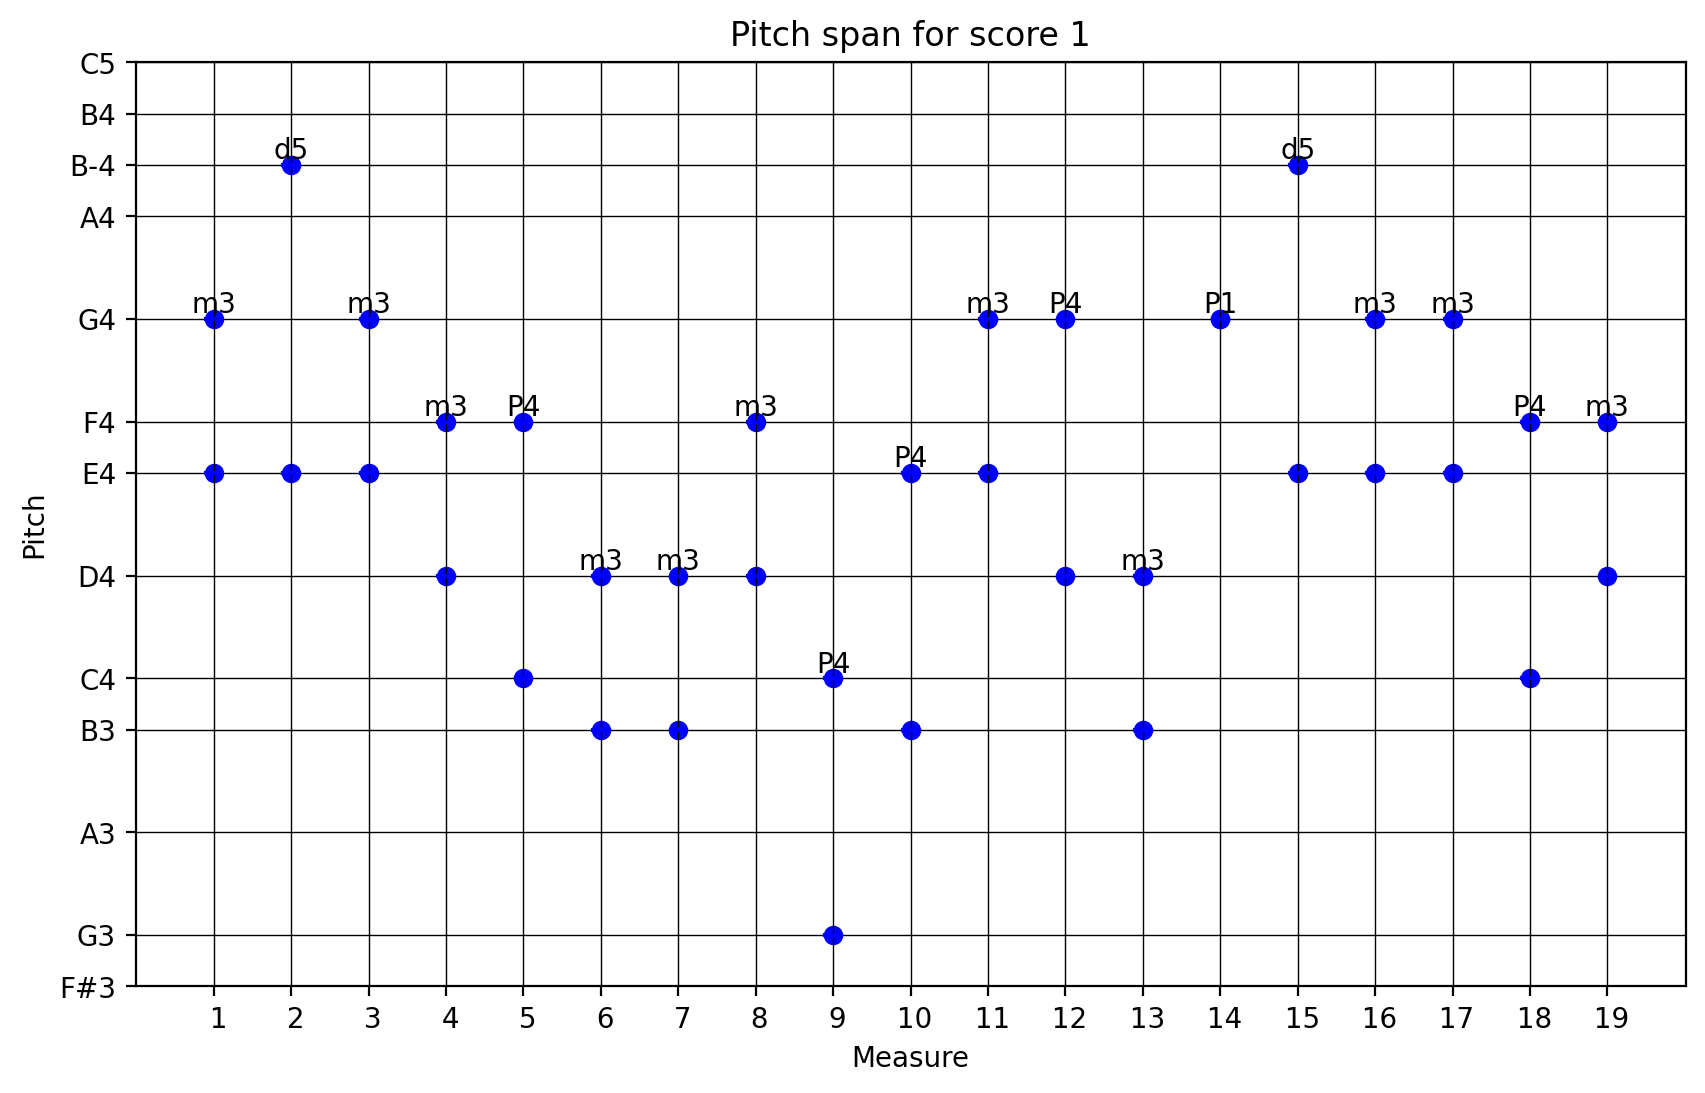

<Figure size 1000x600 with 0 Axes>

unique intervals in this scorePitch span for score 1 ['M2' 'M3' 'M6' 'P1' 'P4' 'P5' 'd5' 'm2' 'm3' 'm6' 'm7']


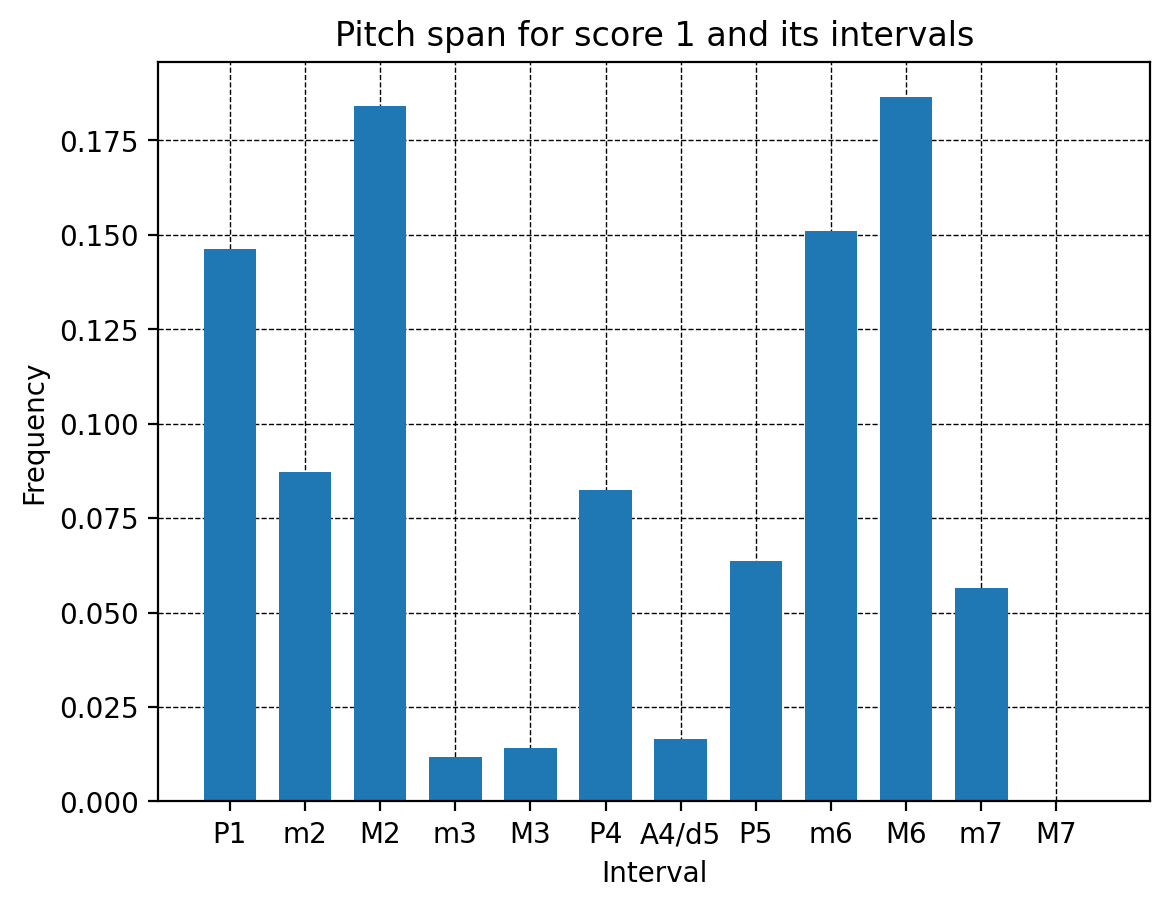

key of the score is C major


(None,
 <music21.graph.plot.HistogramPitchSpace for <music21.stream.Part Violin>>)

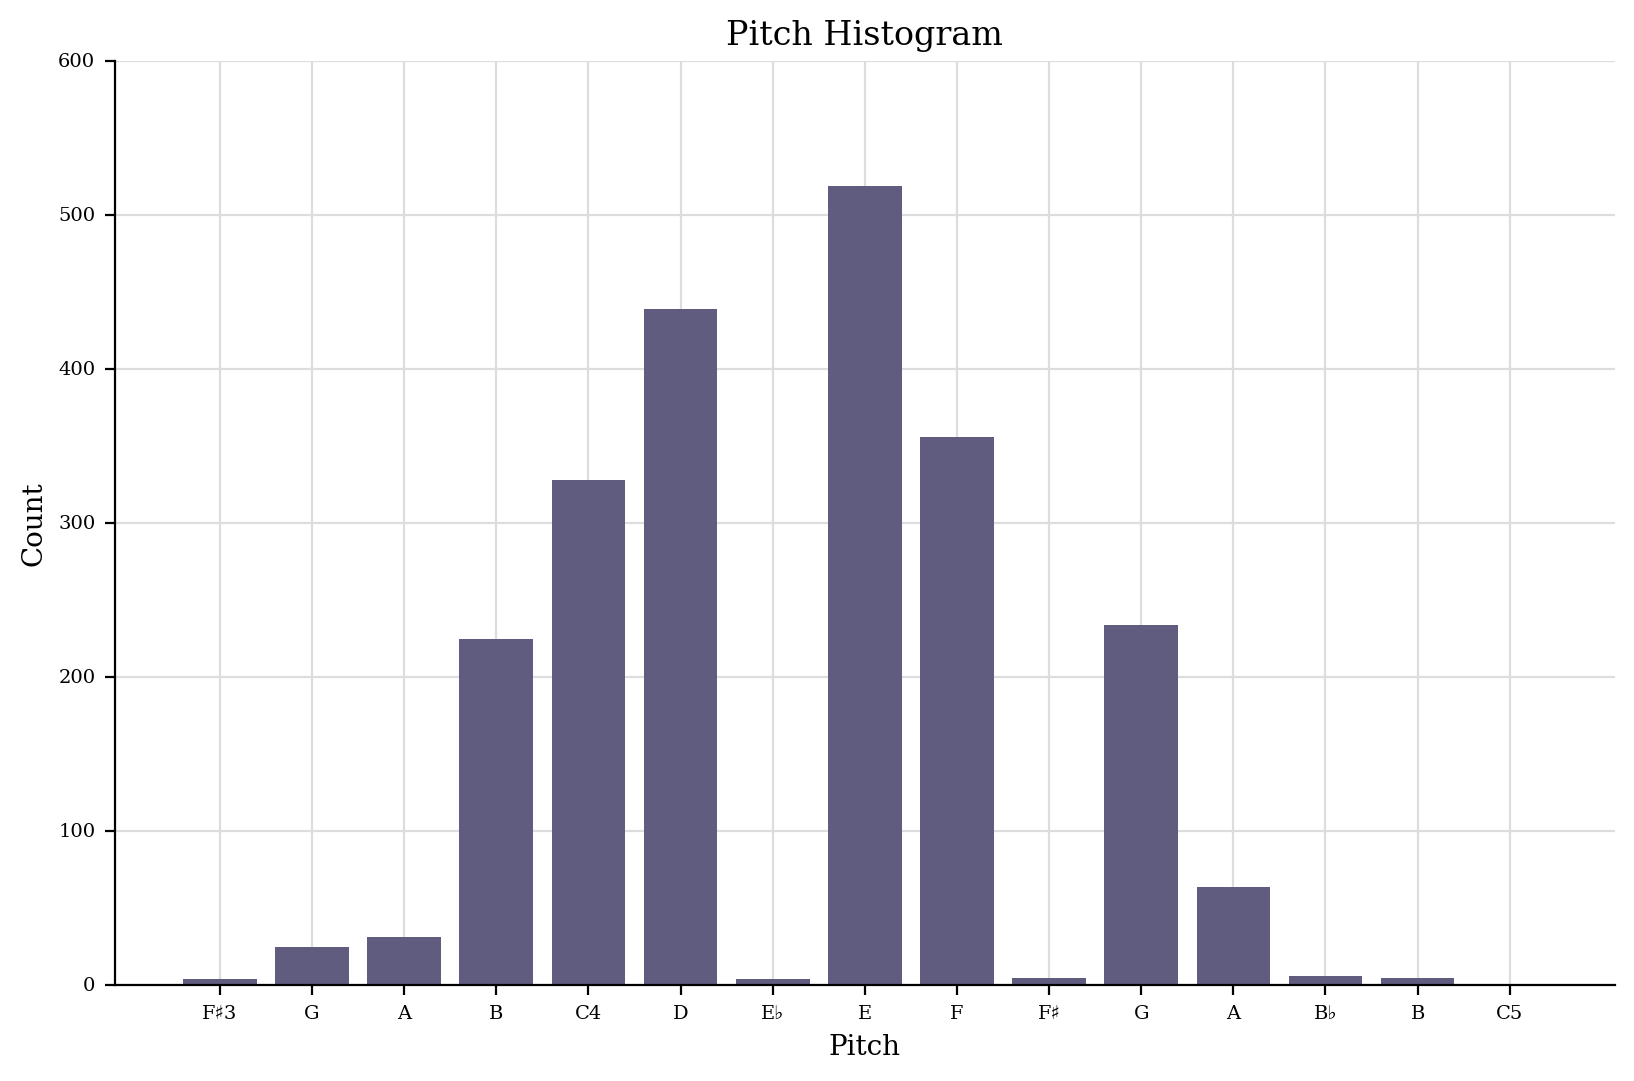

In [56]:
plot_pitch_span(limited_measures1, pitch_span_dict1, 19, title="Pitch span for score 1")

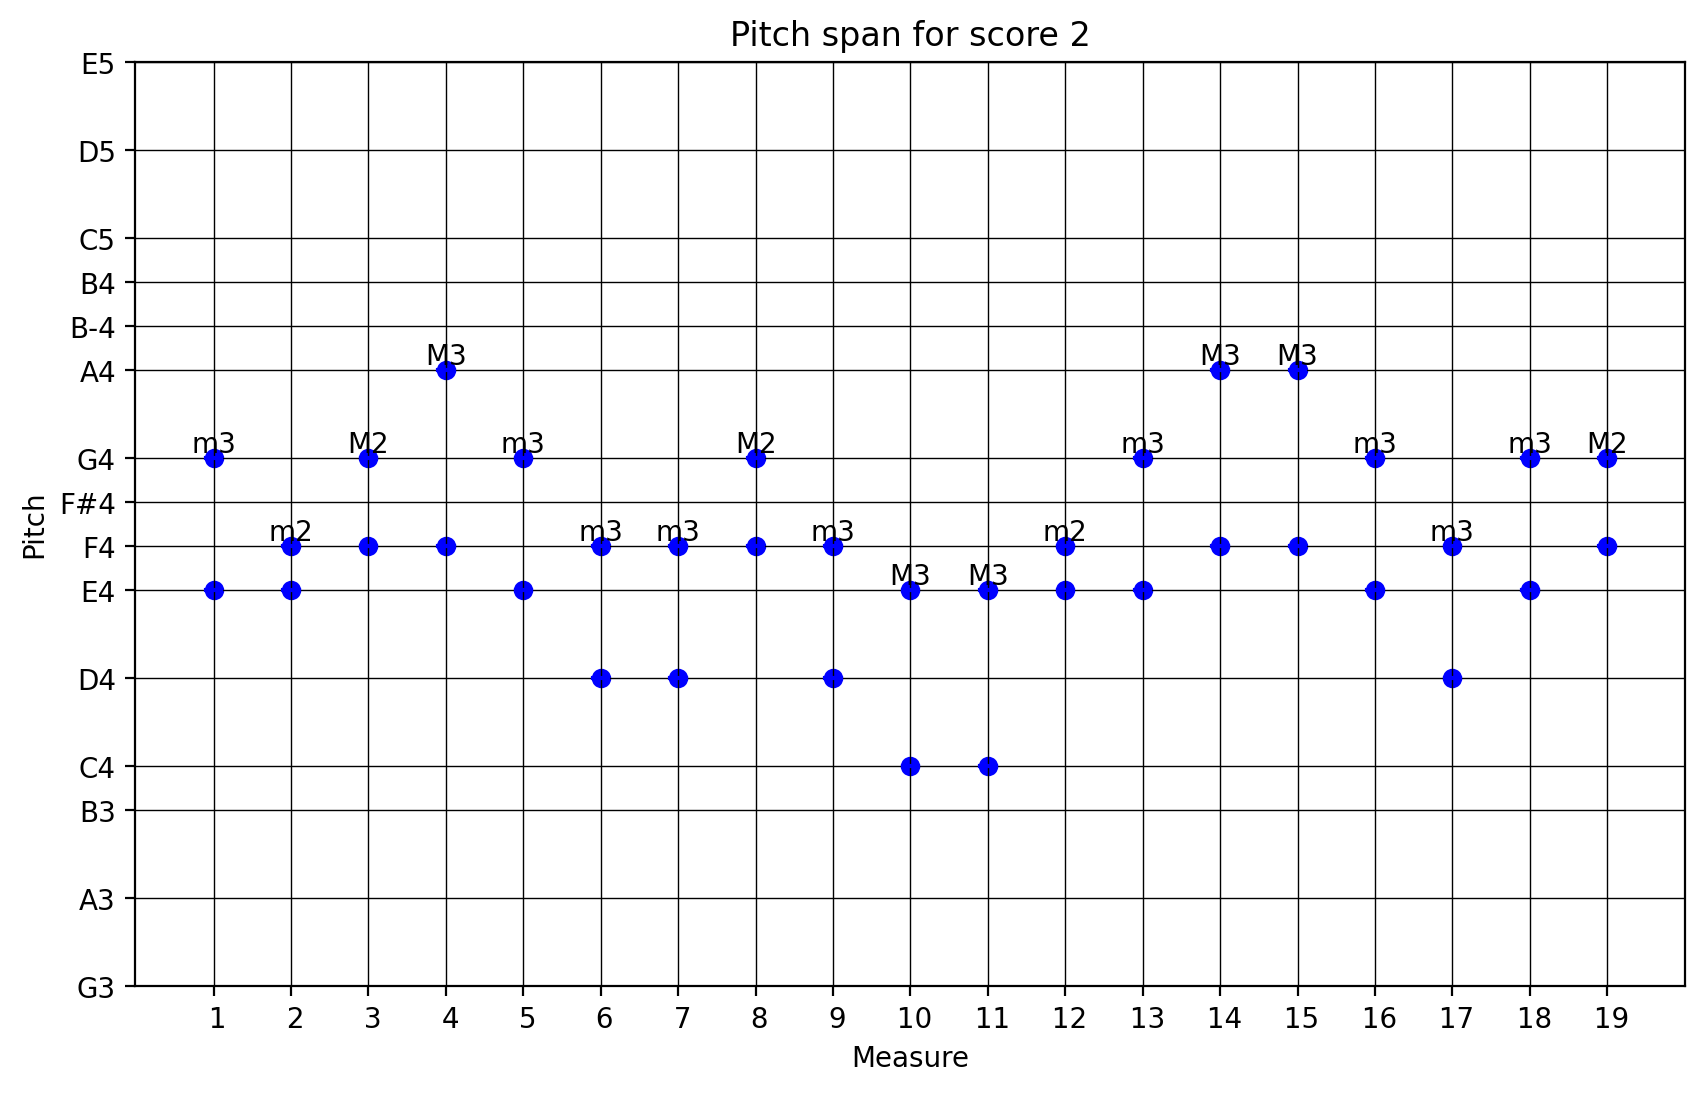

<Figure size 1000x600 with 0 Axes>

unique intervals in this scorePitch span for score 2 ['M2' 'M3' 'M6' 'P1' 'P4' 'P5' 'd5' 'm2' 'm3' 'm6' 'm7']


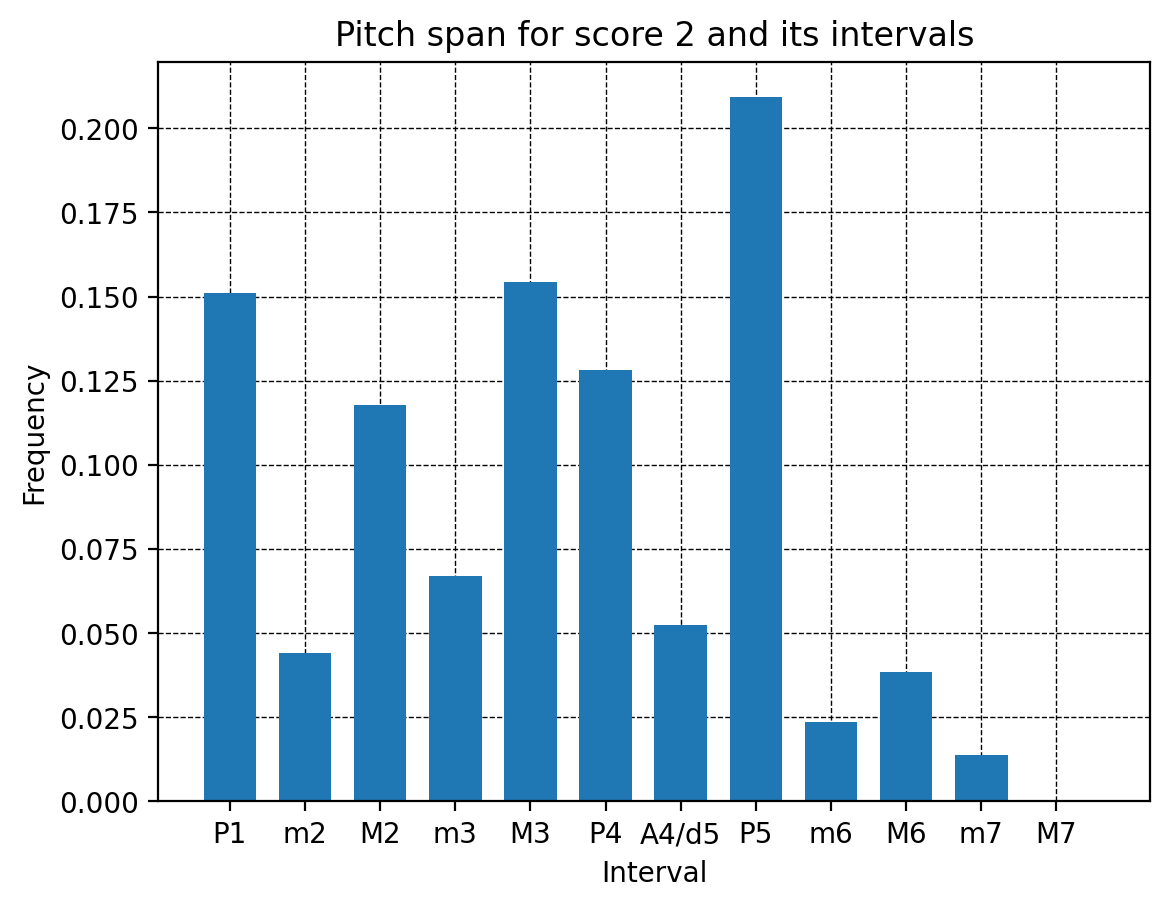

key of the score is C major


(None,
 <music21.graph.plot.HistogramPitchSpace for <music21.stream.Part Violin>>)

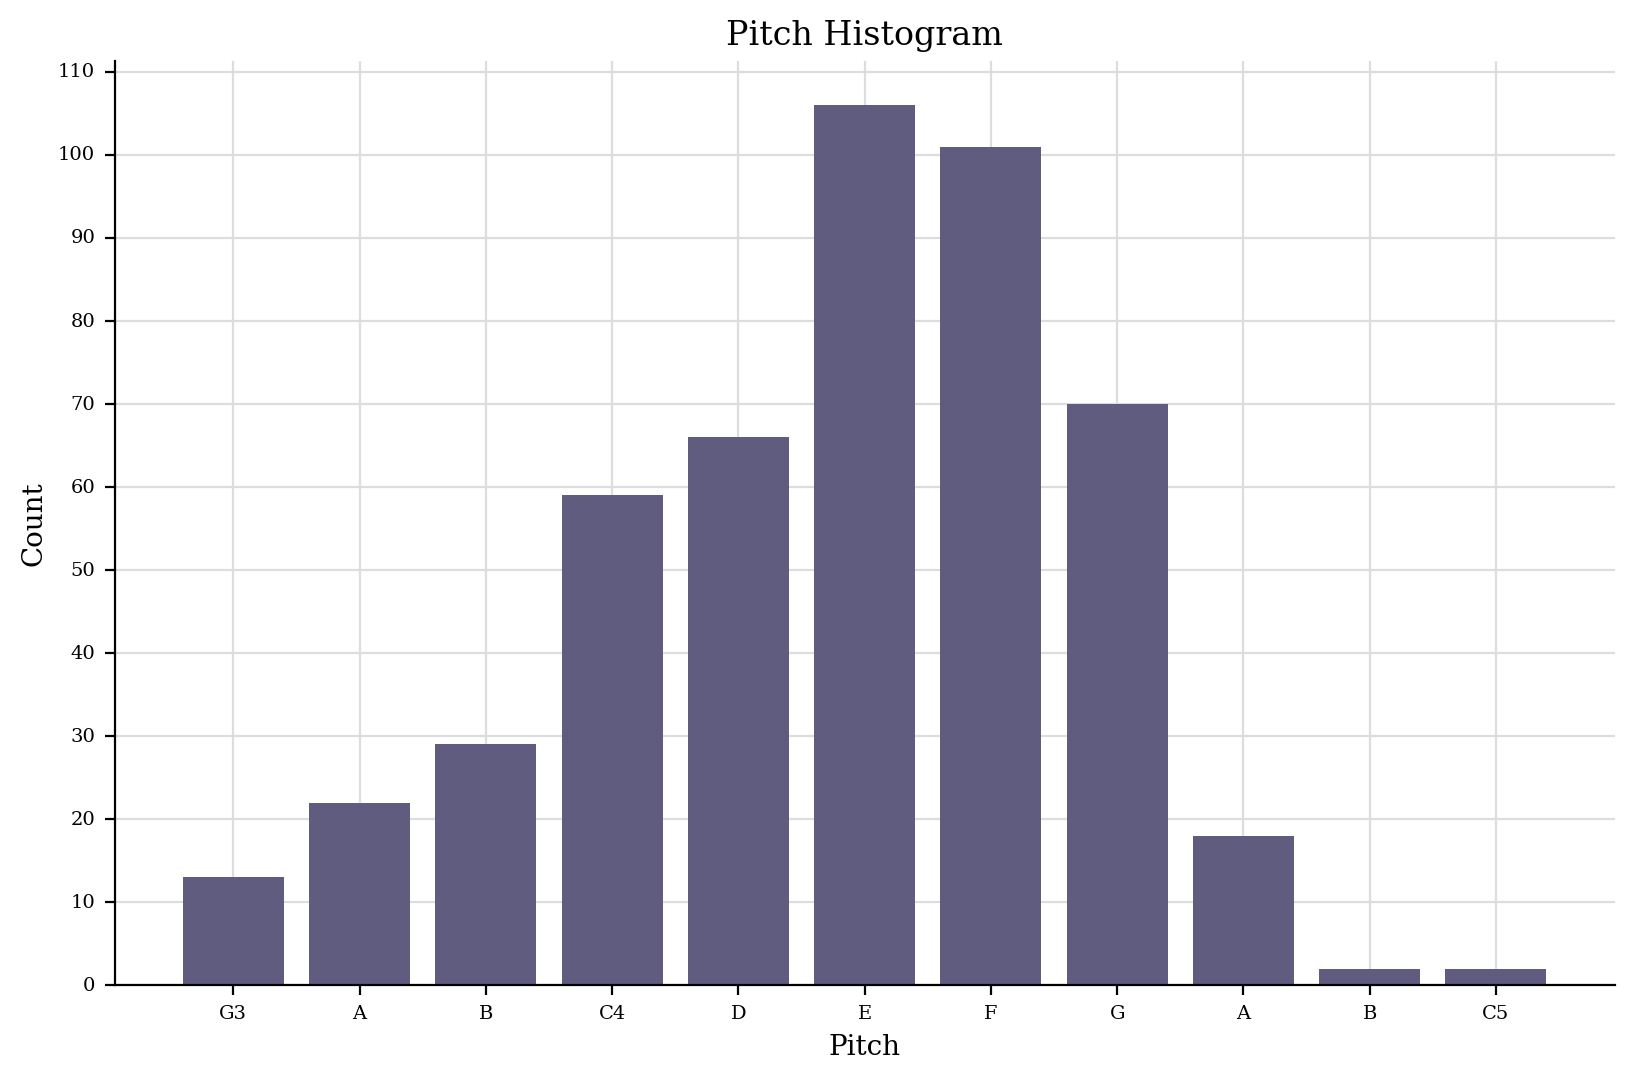

In [58]:
plot_pitch_span(limited_measures2, pitch_span_dict2,
                19, title="Pitch span for score 2")


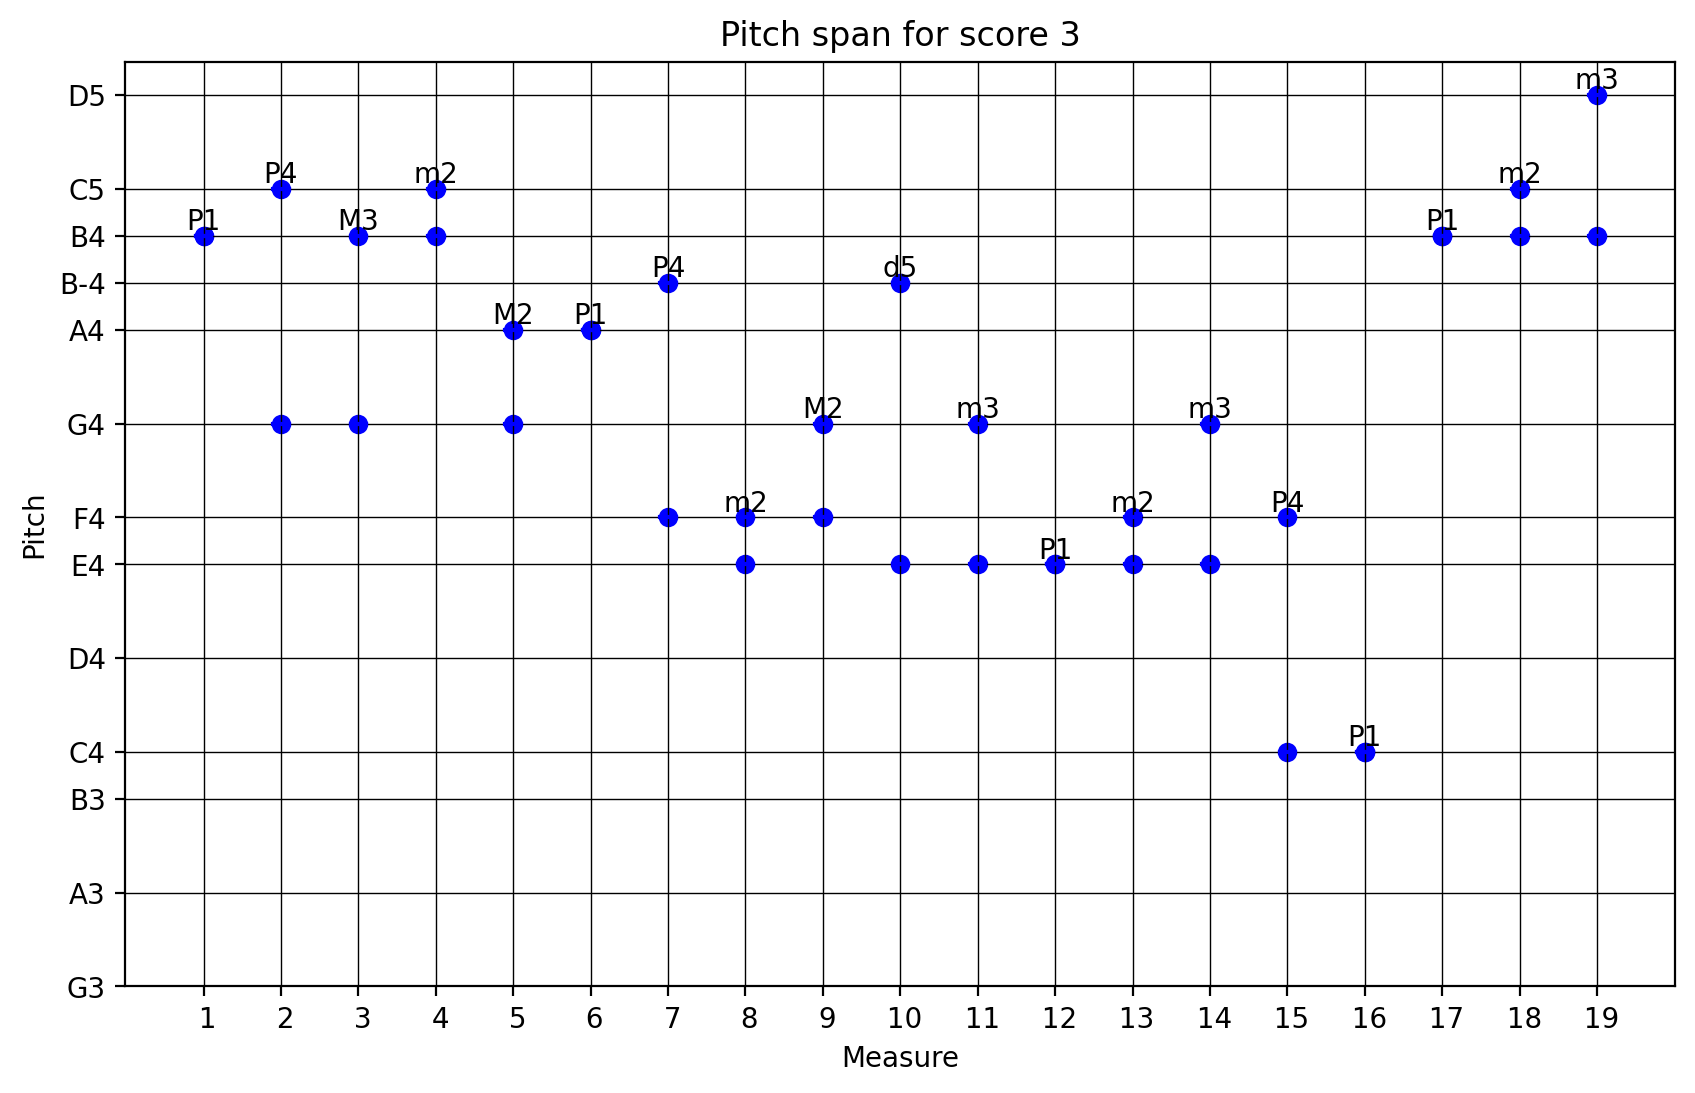

<Figure size 1000x600 with 0 Axes>

unique intervals in this scorePitch span for score 3 ['M2' 'M3' 'M6' 'P1' 'P4' 'P5' 'd5' 'm2' 'm3' 'm6' 'm7']


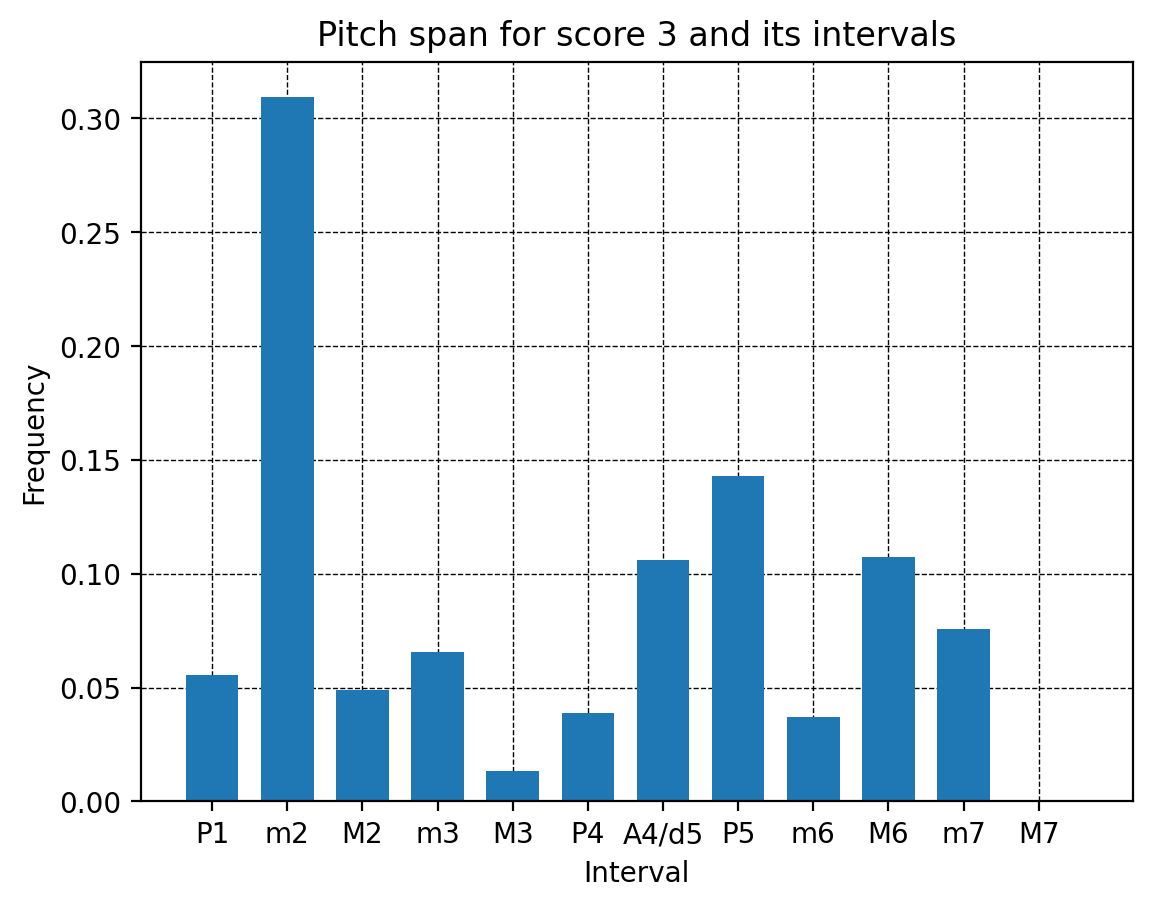

key of the score is C major


(None,
 <music21.graph.plot.HistogramPitchSpace for <music21.stream.Part Violin>>)

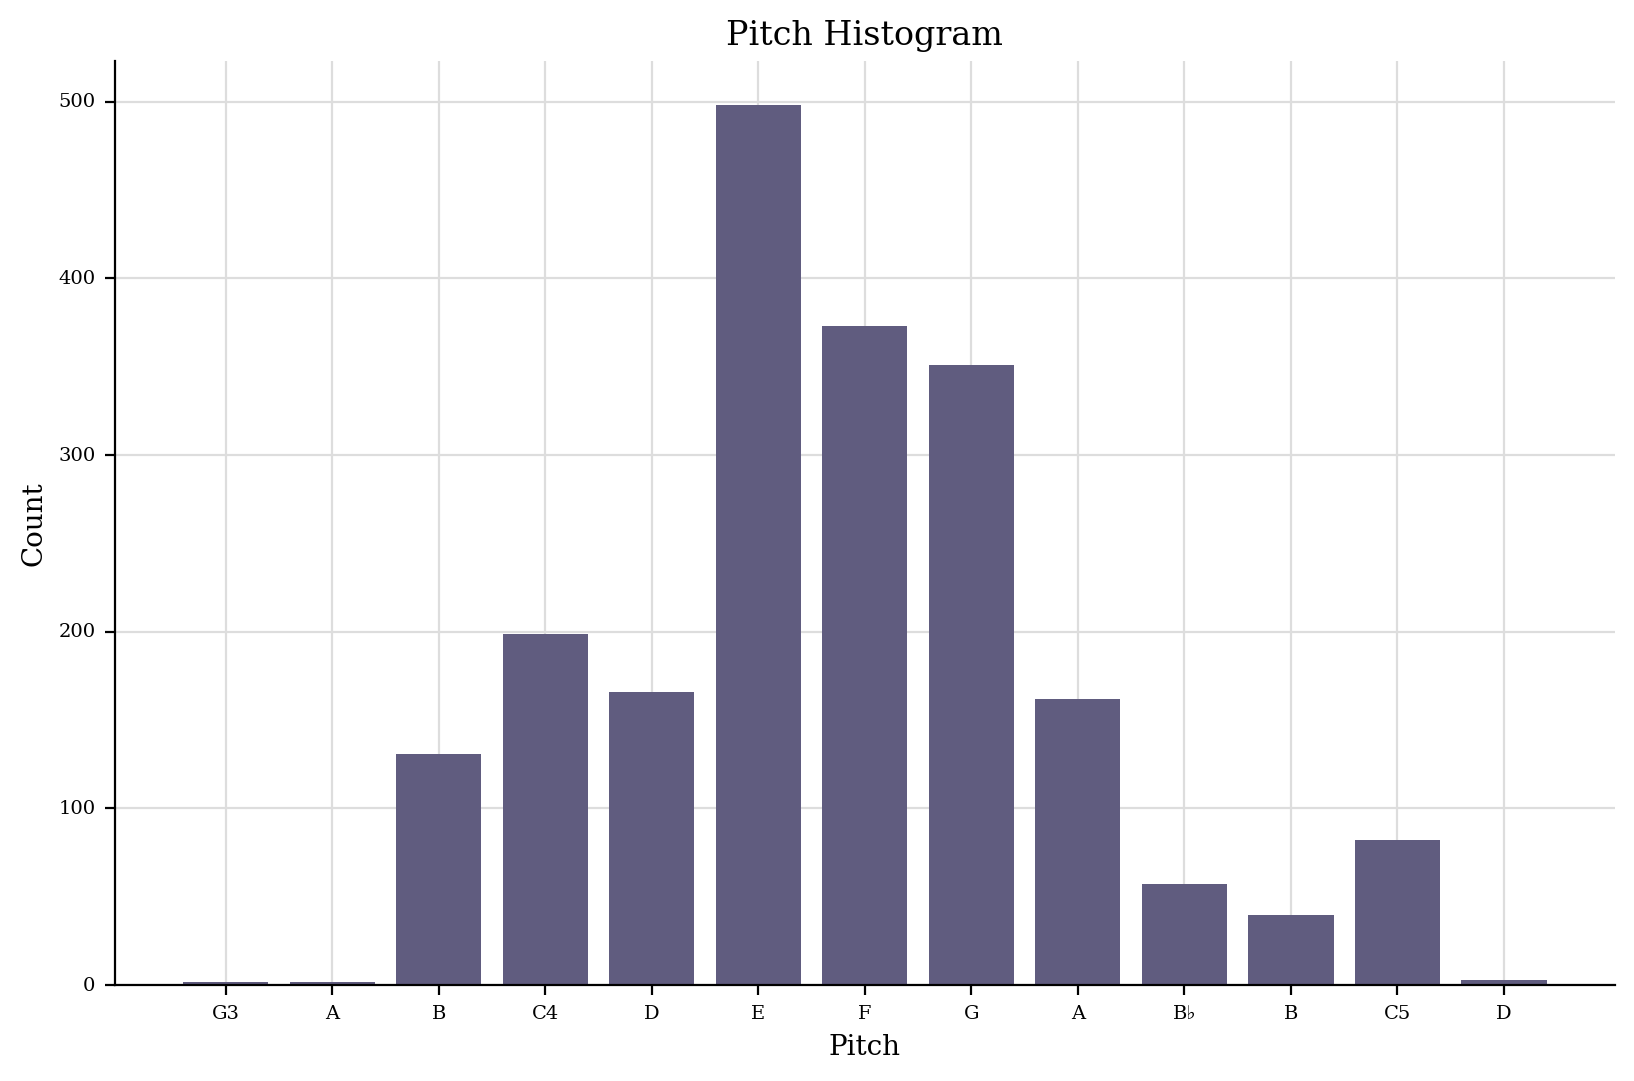

In [59]:
plot_pitch_span(limited_measures3, pitch_span_dict3,
                19, title="Pitch span for score 3")



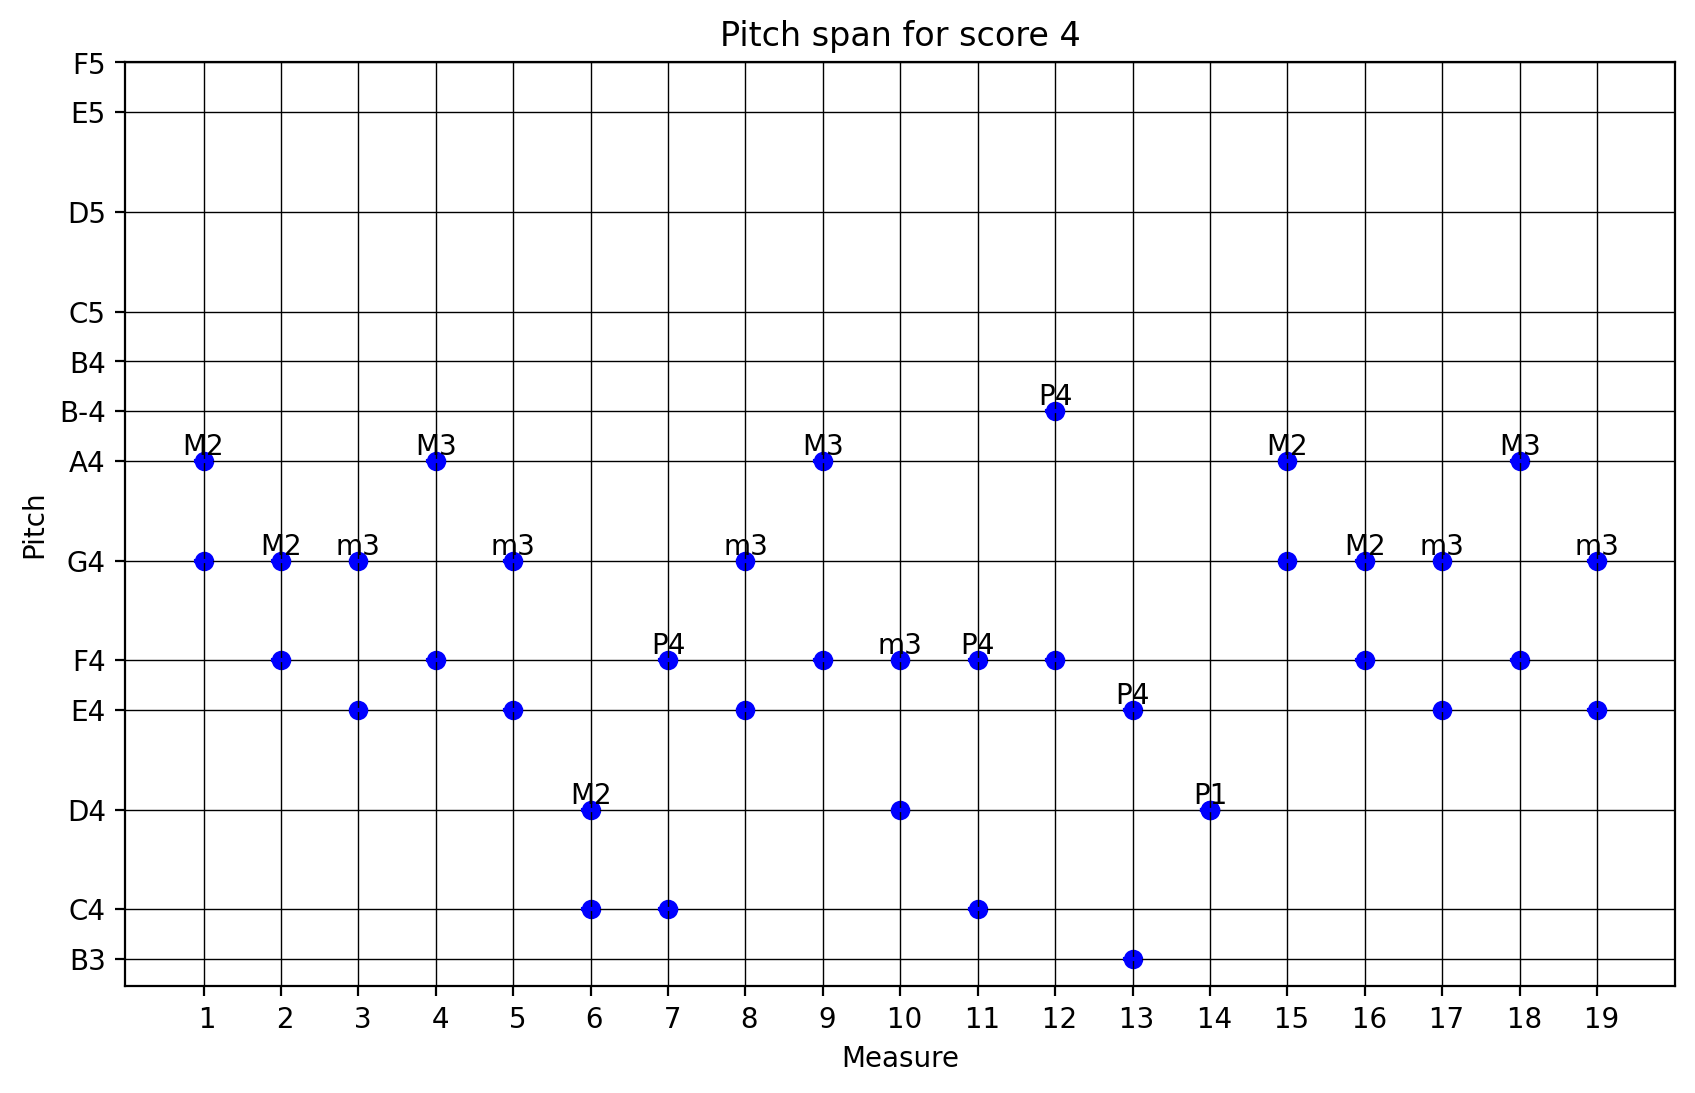

<Figure size 1000x600 with 0 Axes>

unique intervals in this scorePitch span for score 4 ['A4' 'M2' 'M3' 'M6' 'P1' 'P4' 'P5' 'm2' 'm3' 'm6' 'm7']


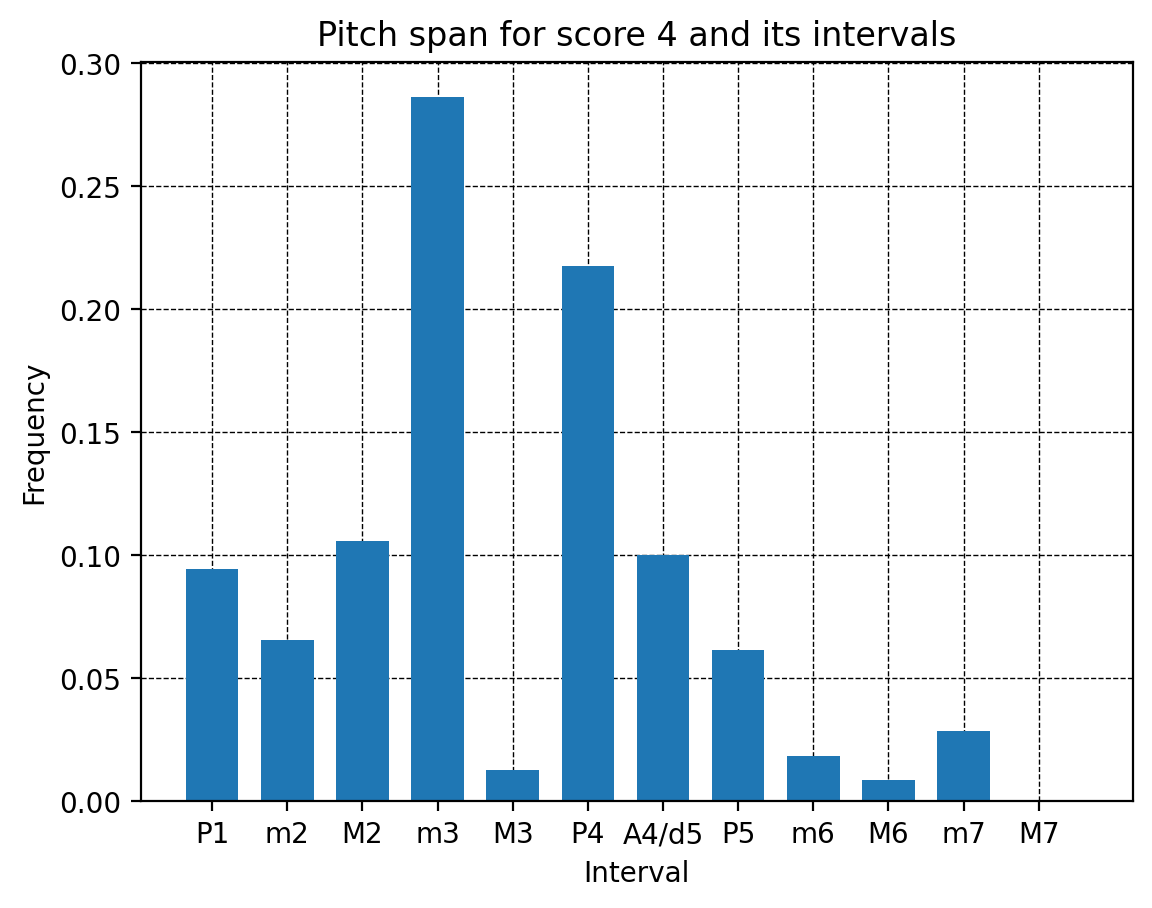

key of the score is F major


(None,
 <music21.graph.plot.HistogramPitchSpace for <music21.stream.Part Violin>>)

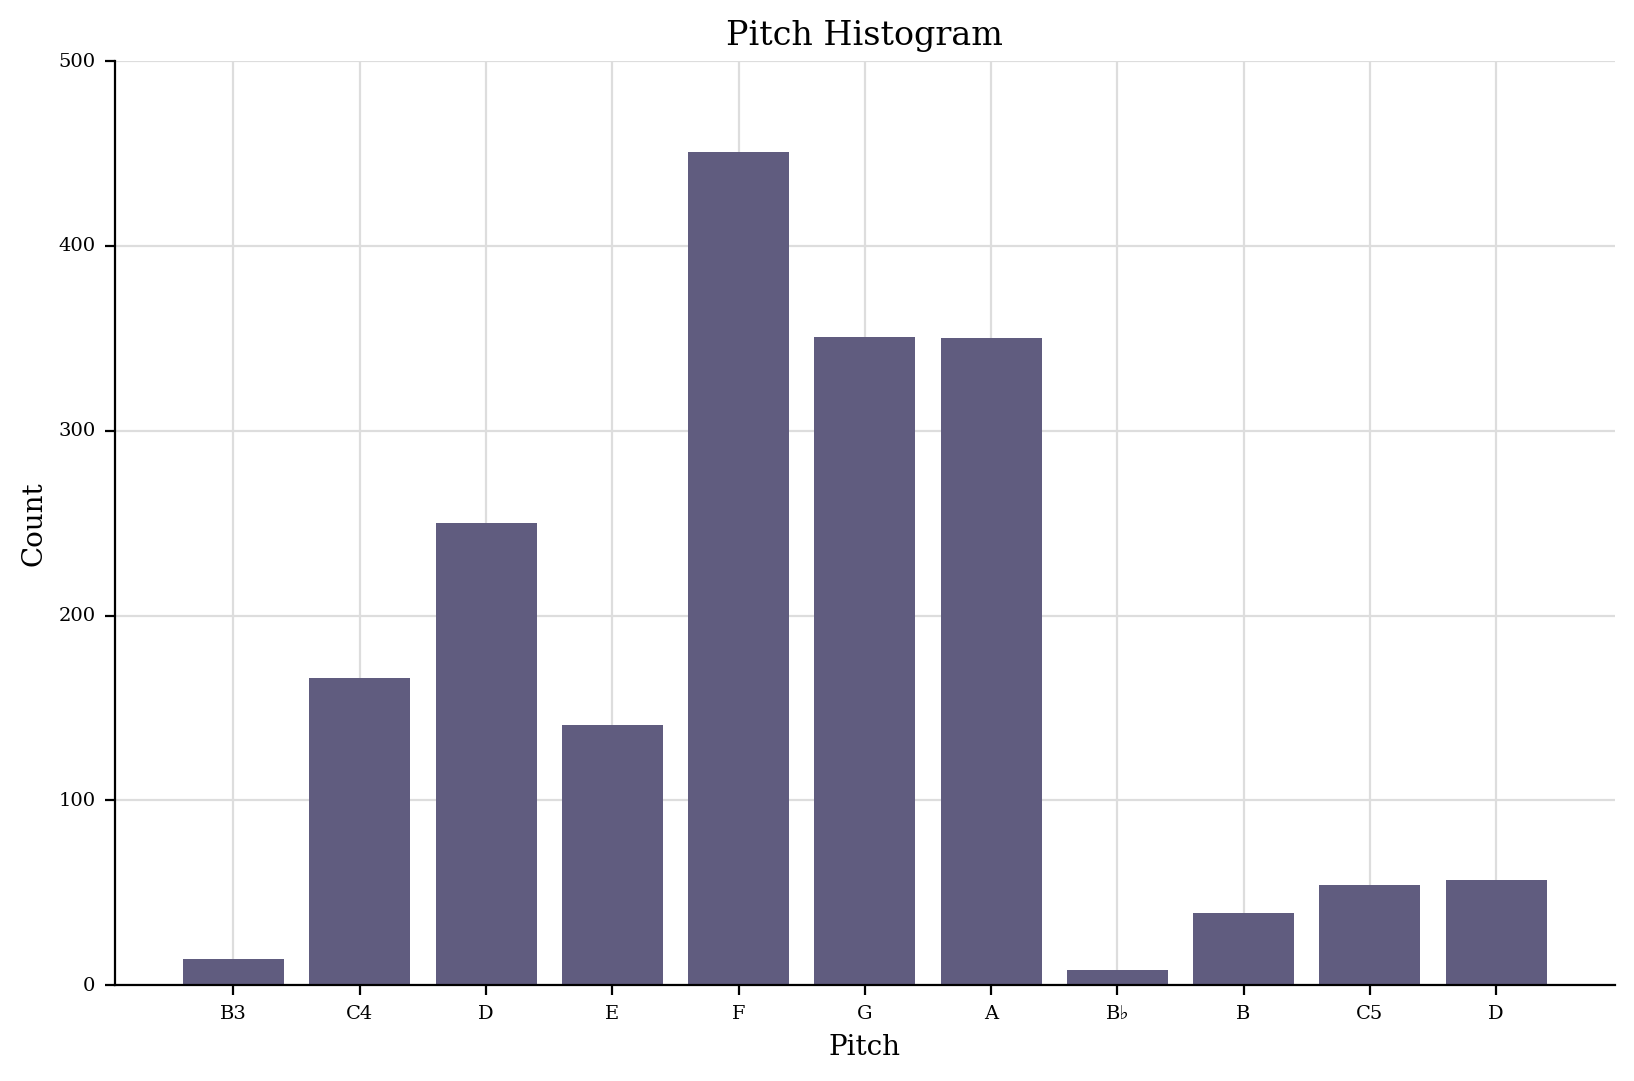

In [60]:
plot_pitch_span(limited_measures4, pitch_span_dict4,
                19, title="Pitch span for score 4")



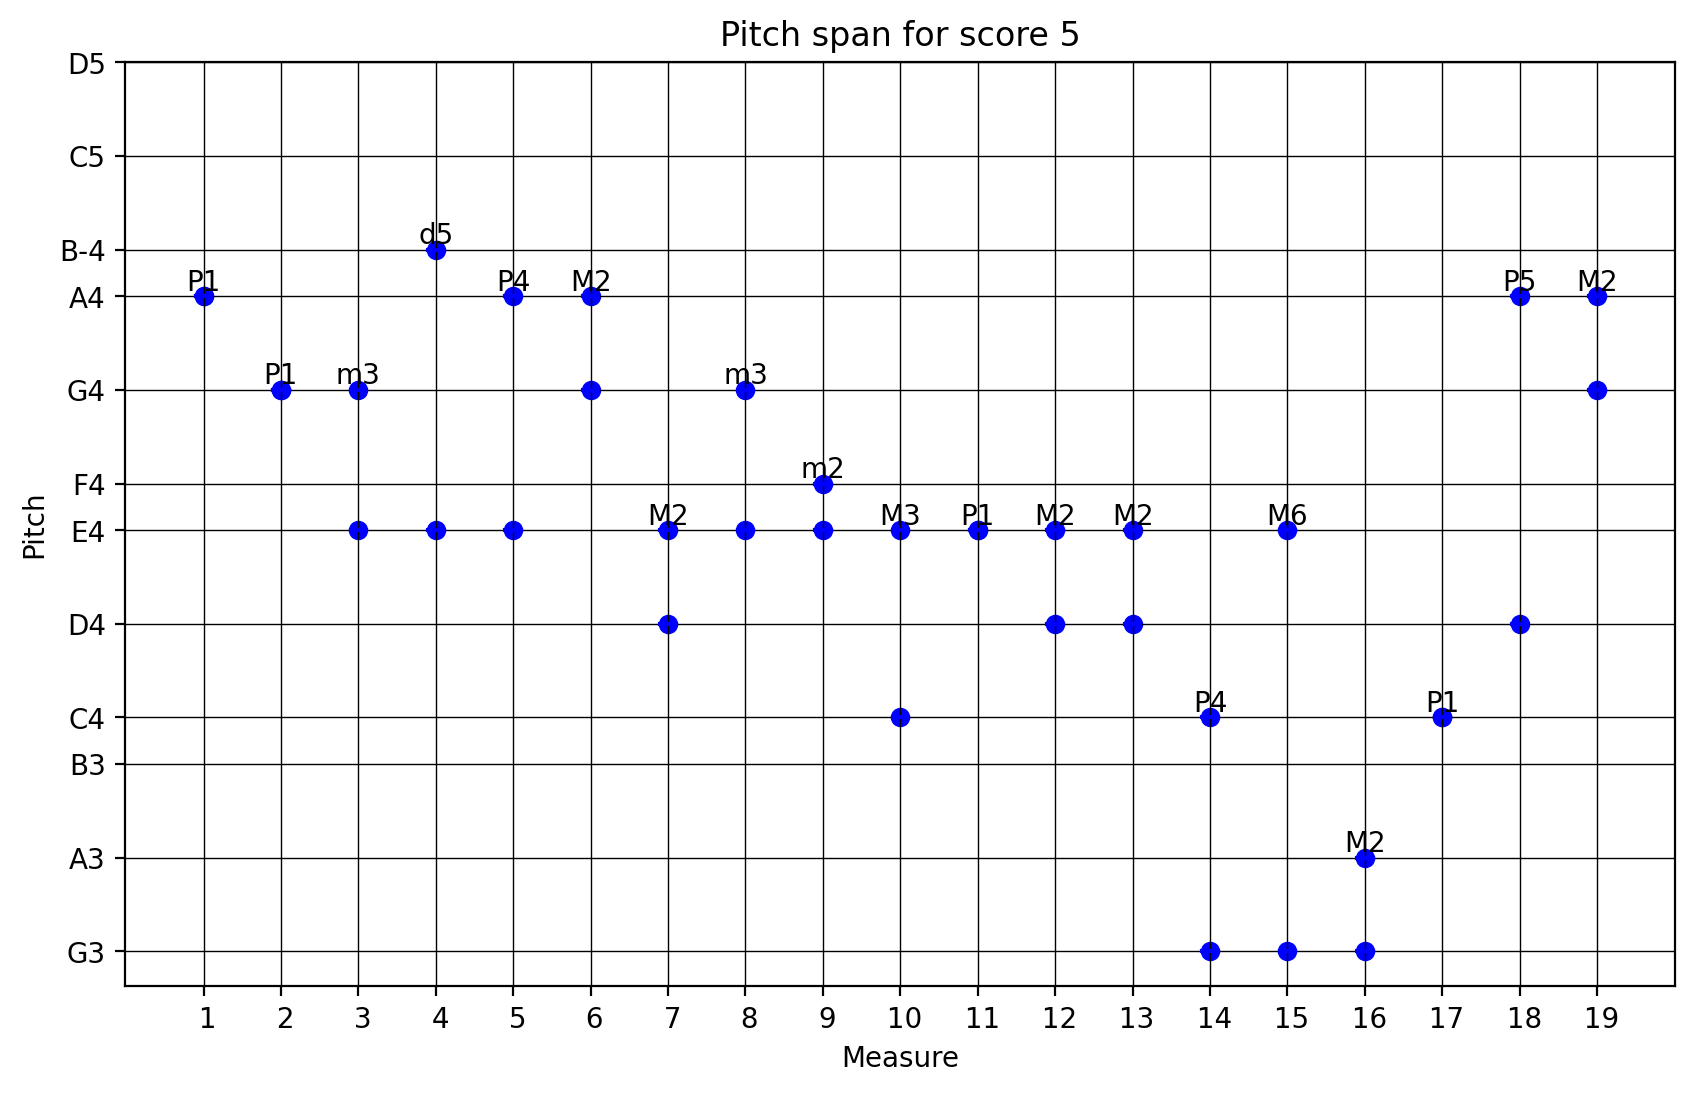

<Figure size 1000x600 with 0 Axes>

unique intervals in this scorePitch span for score 5 ['M2' 'M3' 'M6' 'P1' 'P4' 'P5' 'd5' 'm2' 'm3' 'm6' 'm7']


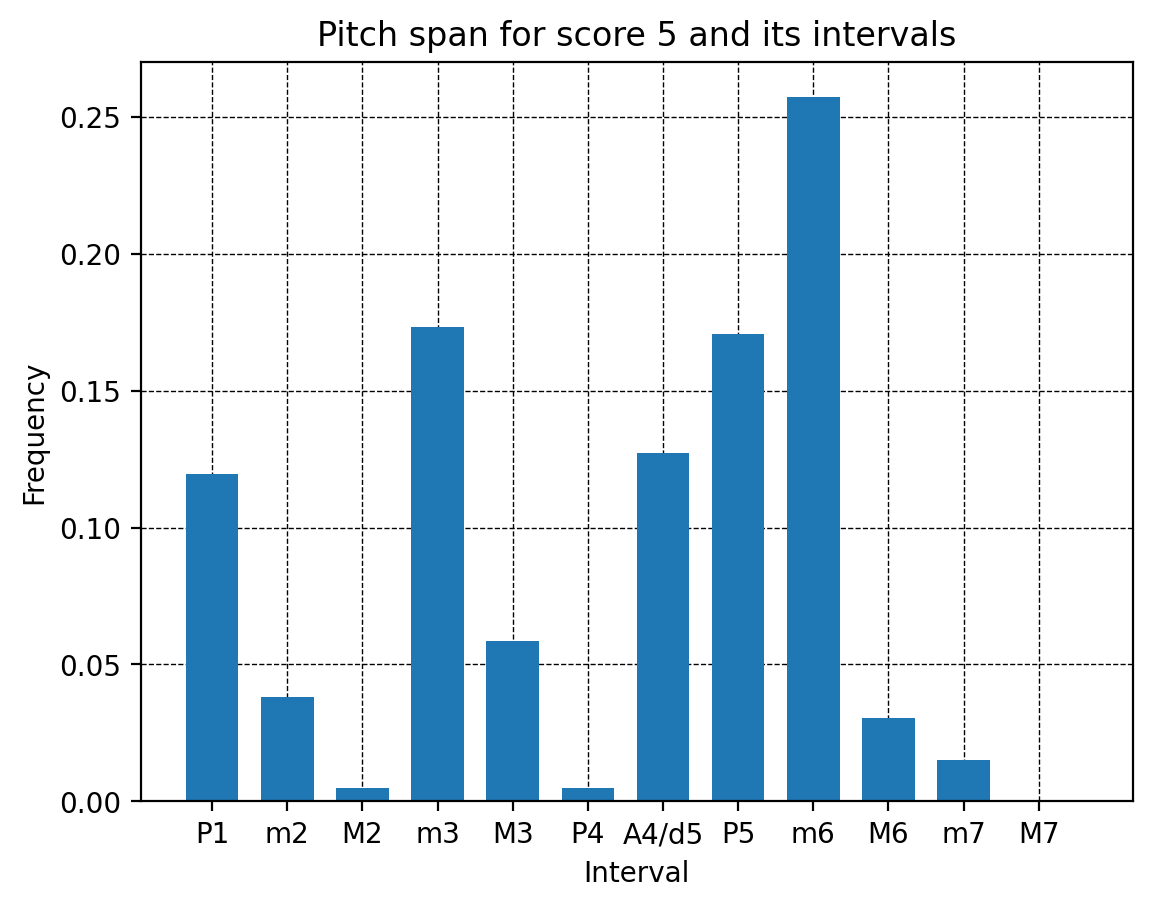

key of the score is C major


(None,
 <music21.graph.plot.HistogramPitchSpace for <music21.stream.Part Violin>>)

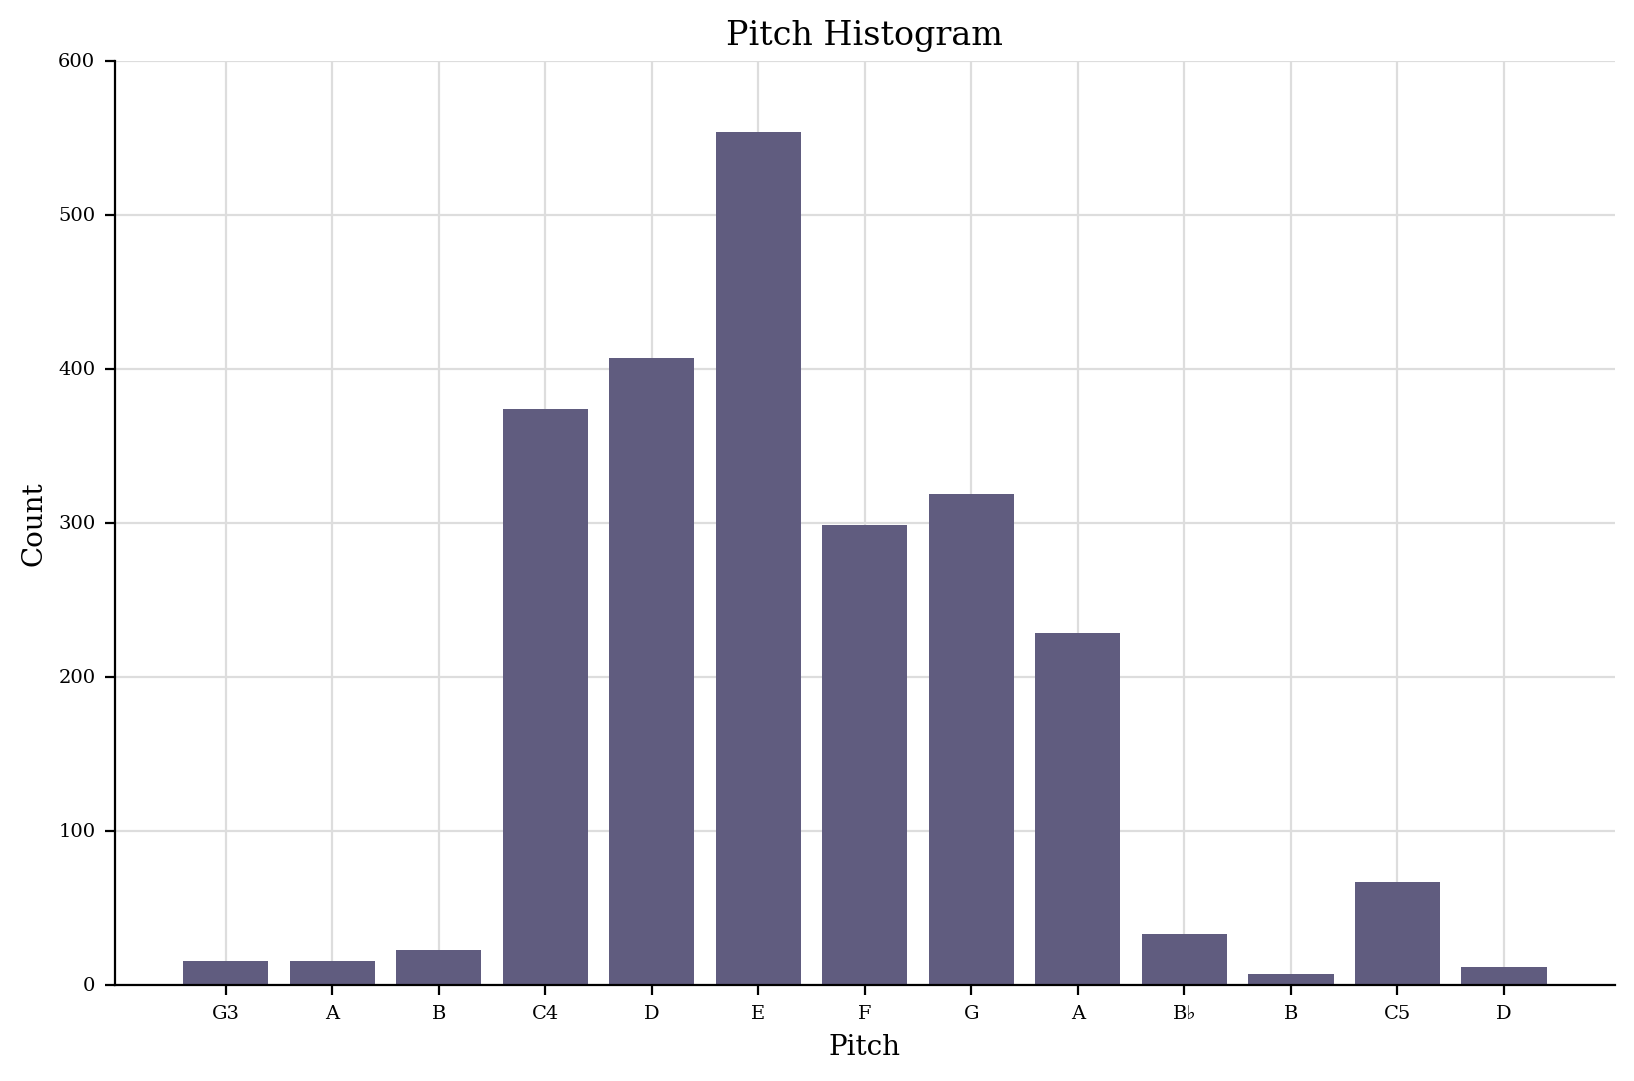

In [61]:
plot_pitch_span(limited_measures5, pitch_span_dict5,
                19, title="Pitch span for score 5")


# Pianoroll

In [62]:
# print("pianoroll_Btayhi_Isbahan")
# pianoroll_Btayhi_Isbahan = limited_measures1.plot('pianoroll')


In [13]:
# print("pianoroll_Btayhi_Istihlal")
# pianoroll_Btayhi_Istihlal = limited_measures2.plot('pianoroll')

In [14]:
# print("pianoroll_Btayhi_Isbahan")
# pianoroll_Btayhi_Isbahan = limited_measures3.plot('pianoroll')

In [15]:
# print("pianoroll_Raml_Maya")
# pianoroll_Raml_Maya = limited_measures1.plot('pianoroll')

In [16]:
# print("pianoroll_Rasd_Dayl")
# pianoroll_Rasd_Dayl = limited_measures5.plot('pianoroll')


## Piano roll using matplotlib

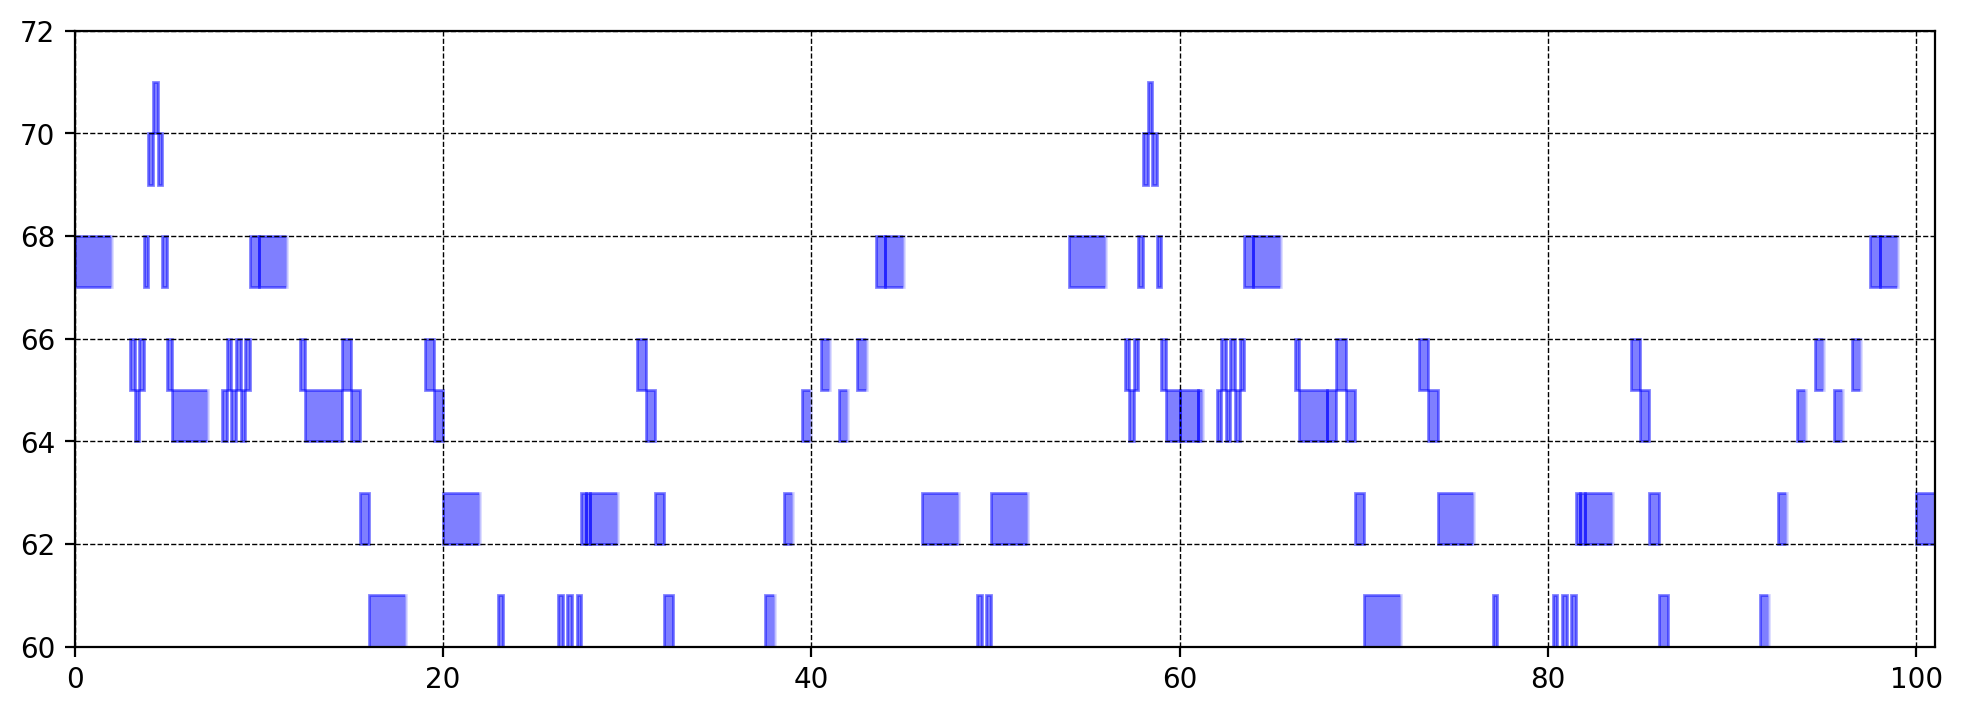

In [17]:
# pianoroll matplotlib

score = converter.parse('Btayhi_Isbahan.mxl')
stream = score.parts[0].measures(0, 100)

notes = []
for element in stream.flat.notesAndRests:
    if isinstance(element, note.Note):
        pitch = element.pitch.midi
        start = element.offset
        duration = element.duration.quarterLength
        notes.append((pitch, start, duration))
    elif isinstance(element, note.Rest):
        start = element.offset
        duration = element.duration.quarterLength
        notes.append(('rest', start, duration))

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.set_xlim(0, len(stream))
ax.set_ylim(60, 72)
note_color = 'blue'  # blue
rest_color = 'white'  # red

for note in notes:
    if note[0] == 'rest':
        rect = plt.Rectangle((note[1], 0), note[2],
                             128, color=rest_color, alpha=0.5)
    else:
        rect = plt.Rectangle((note[1], note[0]),
                             note[2], 1, color=note_color, alpha=0.5)
    ax.add_patch(rect)

plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()


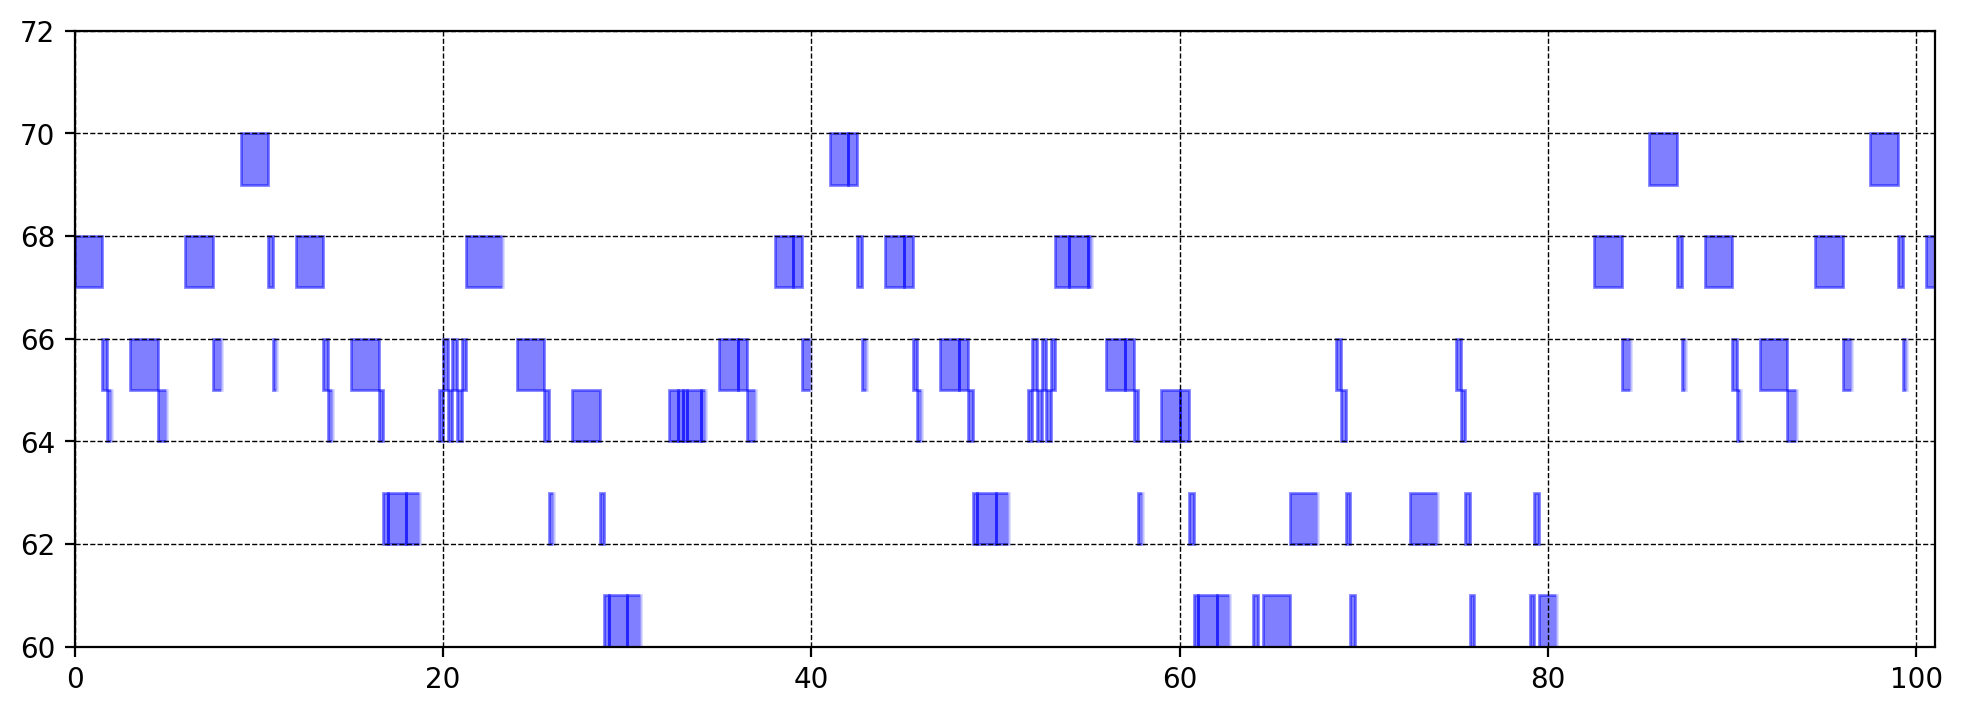

In [63]:
# pianoroll matplotlib

score = converter.parse('Btayhi_Istihlal.mxl')
stream = score.parts[0].measures(0, 100)

notes = []
for element in stream.flat.notesAndRests:
    if isinstance(element, note.Note):
        pitch = element.pitch.midi
        start = element.offset
        duration = element.duration.quarterLength
        notes.append((pitch, start, duration))
    elif isinstance(element, note.Rest):
        start = element.offset
        duration = element.duration.quarterLength
        notes.append(('rest', start, duration))

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
ax.set_xlim(0, len(stream))
ax.set_ylim(60, 72)
note_color = 'blue'  # blue
rest_color = 'white'  # red

for note in notes:
    if note[0] == 'rest':
        rect = plt.Rectangle((note[1], 0), note[2],
                             128, color=rest_color, alpha=0.5)
    else:
        rect = plt.Rectangle((note[1], note[0]),
                             note[2], 1, color=note_color, alpha=0.5)
    ax.add_patch(rect)

plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.show()
